# General analysis of the system 

In this notebook we introduce the system behaviour, doing a preliminary analysis of the system.

In [1]:
from class_schelling import Schelling, dfs

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.signal import convolve2d
import warnings
from multiprocessing import Pool, cpu_count

warnings.filterwarnings("ignore")
cmap = ListedColormap(['blue', 'white', 'red'])
markers = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

In [3]:
method_list = [method for method in dir(Schelling) if method.startswith('__') is False]
print(method_list)

['density_unwanted', 'dissatisfied_number', 'get_Ebc', 'get_Ebc_normalized', 'get_Es', 'get_Es_normalized', 'get_dissatisfied_location', 'get_location_people', 'opposite_edges_ratio', 'plot', 'real_space_renormalization', 'renormalize', 'run_dissatisfied', 'run_everybody', 'satisfied_number', 'segregation_coefficient']


## Comparisons of running everybody vs running only dissatisfied agents 

In [4]:
s = Schelling(30, 0.5, 0.1) 
s1 = Schelling(30, 0.5, 0.1, 0.5,  s.city) 

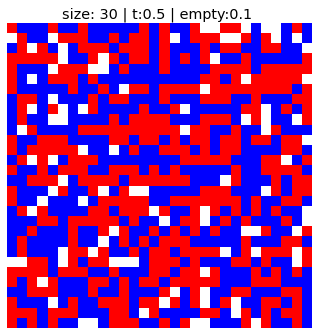

In [5]:
s.plot()

### Running dissatisfied

In [6]:
print(f"Number of dissatisfied agents {s.dissatisfied_number()}")
print(f"Interface density {s.opposite_edges_ratio()}")
print(f"Segregation coefficient {s.segregation_coefficient()}")
print(f"Density Unwanted Locations {s.density_unwanted()}")

Number of dissatisfied agents 465
Interface density 0.4978023766889142
Segregation coefficient 0.057235177564395674
Density Unwanted Locations 0.40425531914893614


In [7]:
for i in range(1000):
    s.run_dissatisfied()

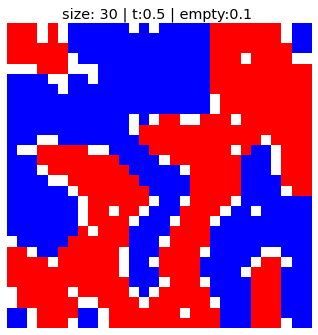

In [8]:
s.plot()

In [9]:
print(f"Number of dissatisfied agents {s.dissatisfied_number()}")
print(f"Interface density {s.opposite_edges_ratio()}")
print(f"Segregation coefficient {s.segregation_coefficient()}")
print(f"Density Unwanted Locations {s.density_unwanted()}")

Number of dissatisfied agents 0
Interface density 0.49820671666123245
Segregation coefficient 0.6702331961591221
Density Unwanted Locations 0.30851063829787234


### Running everybody

Whith the same initial configuration we repeat the evolution, this time adding thermical noise by letting also satisfied agents to move 

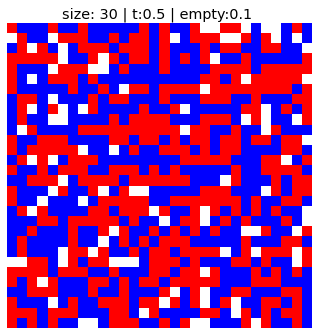

In [10]:
s1.plot()

In [11]:
for i in range(1000):
    s1.run_everybody()

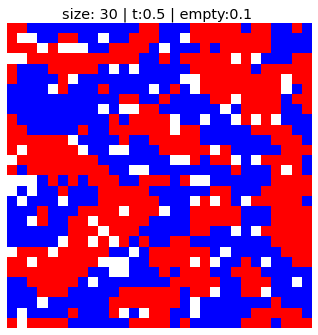

In [13]:
s1.plot()

In [12]:
print(f"Number of dissatisfied agents {s1.dissatisfied_number()}")
print(f"Interface density {s1.opposite_edges_ratio()}")
print(f"Segregation coefficient {s1.segregation_coefficient()}")
print(f"Density Unwanted Locations {s1.density_unwanted()}")

Number of dissatisfied agents 163
Interface density 0.4998363338788871
Segregation coefficient 0.22934918457552203
Density Unwanted Locations 0.5319148936170213


We observe segregation occurs in different kinds dependig on the dynamics chosen

## Segregation coefficient 

_Segregation :_ grouping of agents of the same type and exclusion of the other type in a given area.  The segregation coefficient used here is  [Gauvin et al sect. (2)]. 

Here More neighbors is not used anymore as cluster of different color may overlap without segregation occuring, thus we use Nearest neighbors. 

Segregation coefficient: takes value 1 if complete segregation occurs 



In [14]:
s = Schelling(30, 0.3, 0.2)
N = 20
T = 1000

Models = np.empty(20, dtype=object)
Models_segregation_coefficient =  np.empty((N, T))

for i in range(N): 
  Models[i] = Schelling(30, 0.3, .2, .5, s.city)


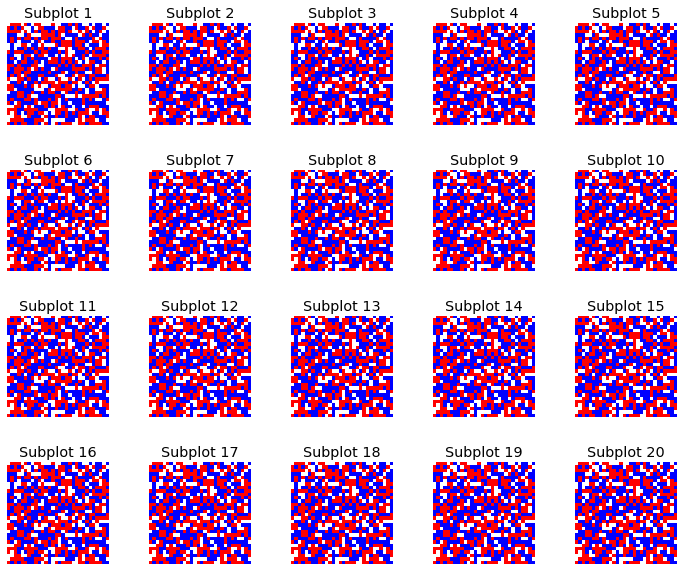

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(4):
    for j in range(5):
        ax = axs[i, j]
        ax.imshow(Models[(i*5)+j].city, cmap)
        ax.set_title(f'Subplot {(i*5)+j+1}')
        #plt.style.use("ggplot")
        ax.axis('off')
        #ax.title(f"size: {self.size} | t:{self.T} | empty:{self.p} ")
plt.show()

In [16]:
for t in range(T):
  for i in range(N):
    Models[i].run_dissatisfied()
    Models_segregation_coefficient[i, t] = Models[i].segregation_coefficient()

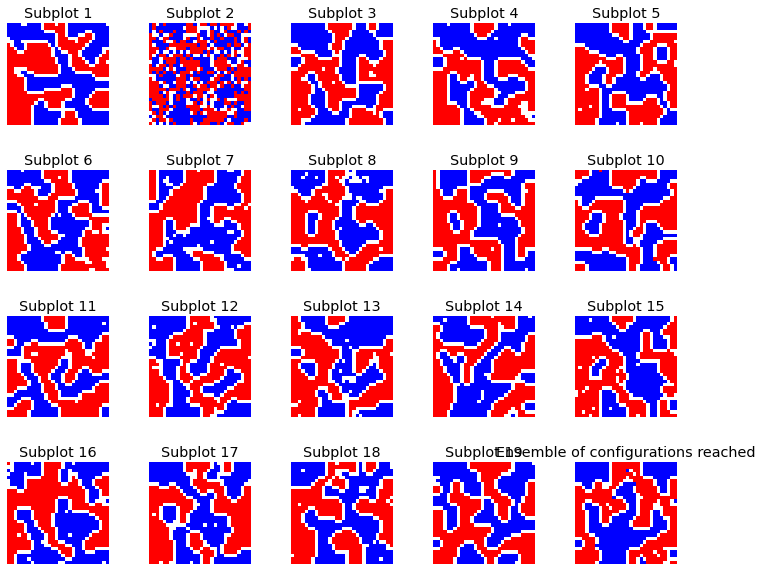

In [11]:
fig, axs = plt.subplots(4, 5, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(4):
    for j in range(5):
        ax = axs[i, j]
        ax.imshow(Models[(i*5)+j].city, cmap)
        ax.set_title(f'Subplot {(i*5)+j+1}')
        ax.axis('off')

plt.title("Ensemble of configurations reached")

plt.show()

Text(0.5, 0, 'Time steps')

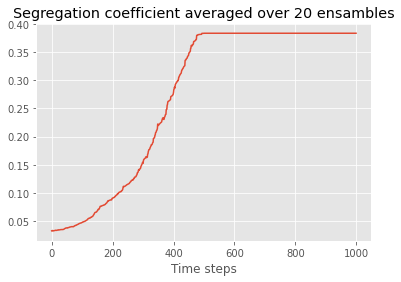

In [17]:
segregation = np.mean(Models_segregation_coefficient, axis = 0)
plt.plot(segregation)
plt.title("Segregation coefficient averaged over 20 ensambles")
plt.xlabel("Time steps")

In [56]:
s.segregation_coefficient()

0.53004420057918

## Dissatisfied number 

In [64]:
s = Schelling(100, 0.5, 0.1)
s1 = Schelling(100, 0.5, 0.1, 0.5, s.city)

In [65]:
x = []
x1 = []
for i in range(10000):
    s.run_dissatisfied()
    s1.run_everybody()
    x.append(s.dissatisfied_number())
    x1.append(s1.dissatisfied_number())

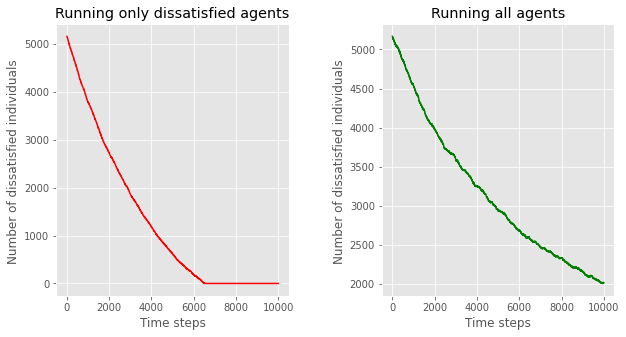

In [69]:
# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first graph on the left subplot
ax1.plot(np.arange(10000), x, 'r-')
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Number of dissatisfied individuals ')
ax1.set_title('Running only dissatisfied agents')


# Plot the second graph on the right subplot
ax2.plot(np.arange(10000), x1, 'g-')
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Number of dissatisfied individuals ')
ax2.set_title('Running all agents')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()

##  Interface density analysis


In [39]:
s = Schelling(100, 0.5, 0.1)

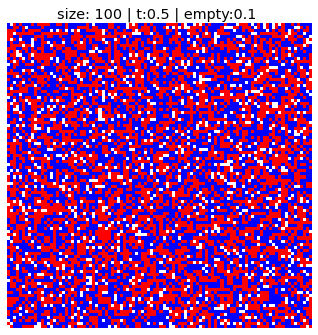

In [40]:
s.plot()

In [41]:
interface_denisty = []
for i in range(10000):
    s.run_dissatisfied()
    interface_denisty.append(s.opposite_edges_ratio())
    

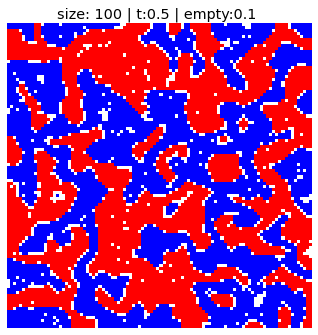

In [42]:
s.plot()

Text(0.5, 1.0, 'Evolution over time of the interface density')

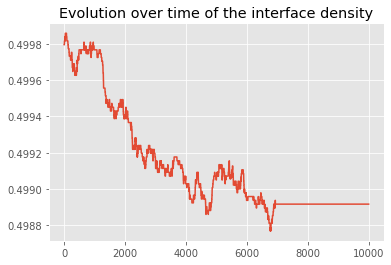

In [44]:
plt.plot(interface_denisty)
plt.title("Evolution over time of the interface density")

## Energy - interlude

### Es  - lyapunov 
Empirical check  for 10 inizialized models with different parameters

In [95]:
T = np.arange(0.2, .9, 0.08)
P = np.arange(.02, .27, .04)
r = []
N = 10000

# initializing 10 random models all with different parameters 
for i in range(10):
    t = random.choice(T)
    p = random.choice(P)
    r.append((t, p))
Models = np.empty( 10, dtype=object)
Models_Es = np.empty((10, N))

for i in range(10):
    Models[i] = Schelling(30, r[i][0], r[i][1])
    

In [96]:
for n in range(N):
    for i in range(10):
        Models[i].run_dissatisfied()
        Models_Es[i, n] = Models[i].get_Es()

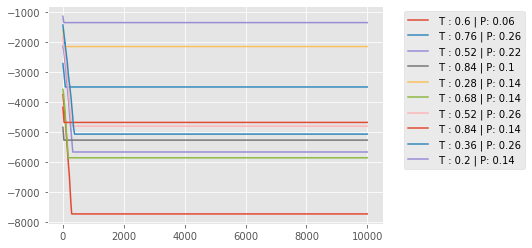

In [97]:
for i in range(10):
    plt.plot(Models_Es[i], label = f" T : {round(r[i][0], 2)} | P: {round(r[i][1], 2)}")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


## Unbalanced systems 

In [90]:
s = Schelling(30, 0.5, 0.1, 0.7)

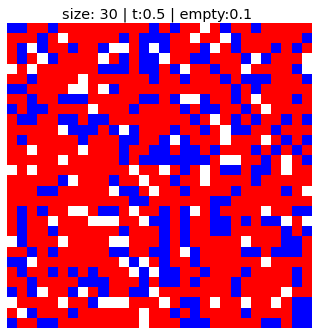

In [91]:
s.plot()

In [92]:
for i in range(1000):
    s.run_dissatisfied()

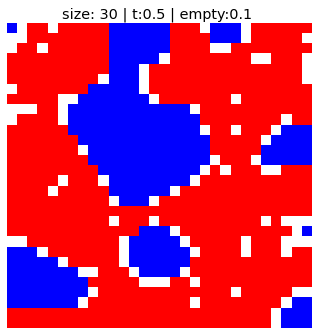

In [93]:
s.plot()